# Credit Card Spending EDA

Importing libraries

In [2]:
import numpy as np
import pandas as pd

Loading data using read_csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Credit card transactions - India - Simple.csv')
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


Understanding the data.

In [4]:
df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174
26051,26051,"Hyderabad, India",19-Oct-13,Signature,Bills,M,184410


In [5]:
df.shape

(26052, 7)

In [6]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
df.dtypes

,0
index,int64
City,object
Date,object
Card Type,object
Exp Type,object
Gender,object
Amount,int64


**Data Cleaning and Feature Engineering**



In [9]:
df.isnull().sum()

,0
index,0
City,0
Date,0
Card Type,0
Exp Type,0
Gender,0
Amount,0


In [10]:
df.duplicated().sum()

0

In [11]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%b-%y')
df.dtypes

,0
index,int64
City,object
Date,datetime64[ns]
Card Type,object
Exp Type,object
Gender,object
Amount,int64


In [12]:
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_of_week

In [13]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Year,Day,DayOfWeek
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,October,2014,29,2
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,August,2014,22,4
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,August,2014,27,2
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,April,2014,12,5
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,May,2015,5,1


In [14]:
season = {'December':"Winter", 'January':"Winter", 'February':"Winter",
         'March':"Spring", 'April':"Spring", 'May':"Spring",
          'June':"Summer", 'July':"Summer", 'August':"Summer",
          'September':"Autumn", 'October':"Autumn", 'November':"Autumn"}
df['Seasons'] = df['Month'].map(season)
df[['Month','Seasons']].head(10)

,Month,Seasons
0,October,Autumn
1,August,Summer
2,August,Summer
3,April,Spring
4,May,Spring
5,September,Autumn
6,February,Winter
7,June,Summer
8,March,Spring
9,September,Autumn


In [15]:
df['City']= df['City'].apply(func= lambda x:x.split(',')[0])
df['City'] = df['City'].apply(func= lambda x:x.split('Greater ')[-1])
df['City'].head(10)

,City
0,Delhi
1,Mumbai
2,Bengaluru
3,Mumbai
4,Bengaluru
5,Delhi
6,Delhi
7,Mumbai
8,Delhi
9,Delhi


***Data Visualization***

Q1. What is the lowest and highest amount spent on the expenses?


In [16]:
min_amount = df['Amount'].mean().min()
max_amount = df['Amount'].mean().max()

print('Lowest amount spent:',min_amount)
print('Highest amount spent:',max_amount)

Lowest amount spent: 156411.5374251497
Highest amount spent: 156411.5374251497


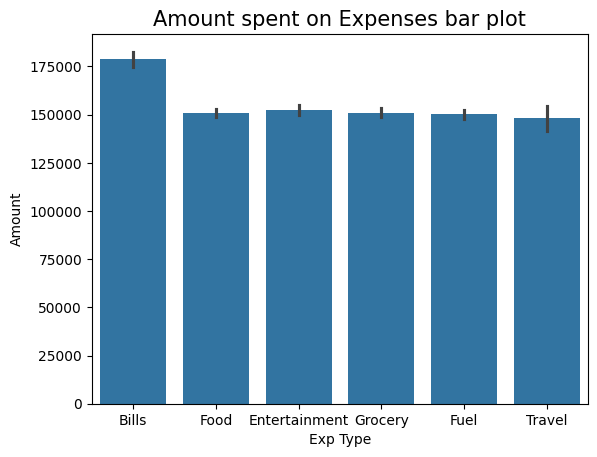

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Exp Type', y='Amount', data=df)
plt.title("Amount spent on Expenses bar plot", size=15)
plt.xlabel('Exp Type', size=10)
plt.ylabel('Amount', size=10)
plt.show()


Q2. Who is one that spends the most and on what?

Q3. What is the least spent expense according to gender?

---



---



In [18]:
df.groupby(['Gender','Exp Type'])['Amount'].mean().sort_values(ascending=False)


Gender  Exp Type     
F       Bills            202809.604545
M       Entertainment    154656.939865
        Food             151736.731946
        Grocery          151573.914445
F       Grocery          150595.962932
        Entertainment    150446.028943
        Food             150337.742032
M       Fuel             150323.257576
F       Fuel             149897.753535
M       Travel           148718.888579
        Bills            147446.800721
F       Travel           147402.453826
Name: Amount, dtype: float64

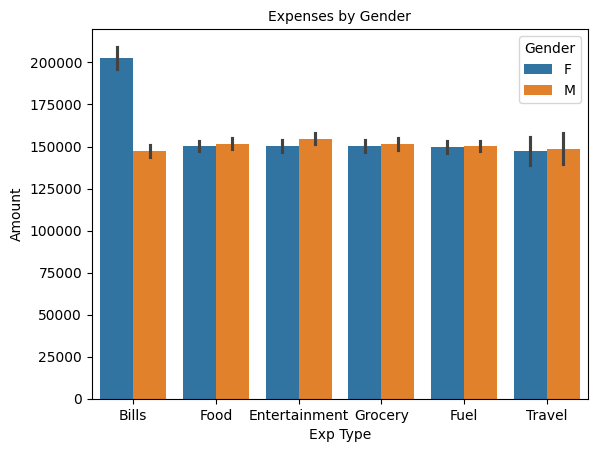

In [19]:

sns.barplot(x=df['Exp Type'], y=df['Amount'], hue='Gender', data=df)
plt.title('Expenses by Gender', size=10)

plt.show()

Q4. In which month are the expenses high?

In [20]:
df.groupby('Month')['Amount'].mean().sort_values(ascending=False)


,Amount
Month,
April,160956.603788
September,158638.480696
January,158416.442322
February,157629.520756
October,157540.715572
August,156822.057430
March,156389.948894
June,154415.689266
December,154306.223168


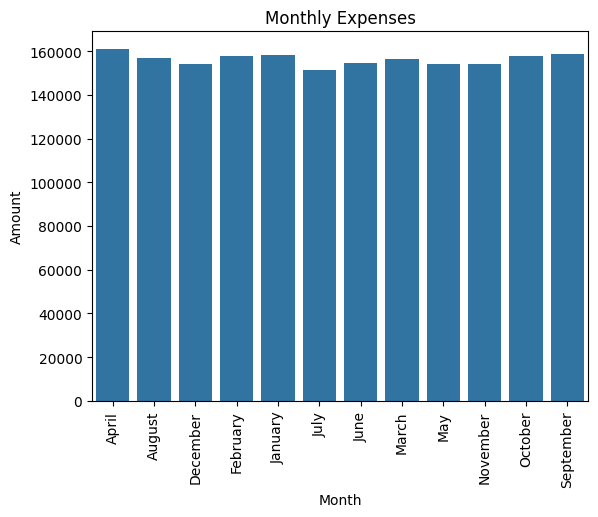

In [21]:
months=df.groupby('Month')['Amount'].mean().reset_index()
sns.barplot(x='Month', y='Amount', data=months)
plt.title('Monthly Expenses')
plt.xticks(rotation=90)
plt.show()

Q5. In which years does the spendings is at the highest and the lowest?

In [22]:
Highest_spending_year = df.groupby('Year')['Amount'].sum().idxmax()
lowest_spending_year = df.groupby('Year')['Amount'].sum().idxmin()

print('Year with higest spending:',Highest_spending_year)
print('Year with lowest spending:',lowest_spending_year)

Year with higest spending: 2014
Year with lowest spending: 2013


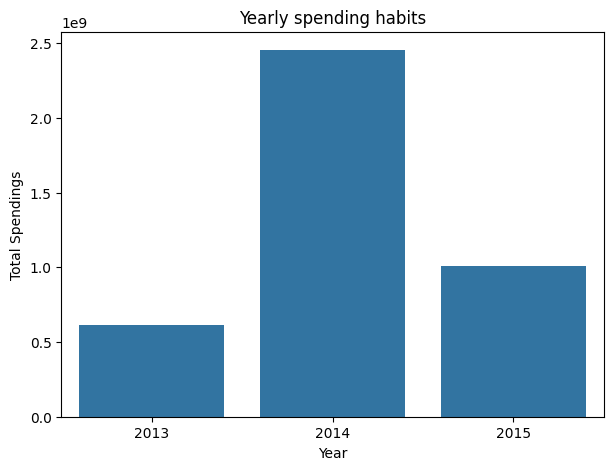

In [23]:
df1=df.groupby('Year')['Amount'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Year', y='Amount', data=df1)
plt.title('Yearly spending habits')
plt.xlabel('Year',size=10)
plt.ylabel('Total Spendings')
plt.show()

Q6. Is weekdays or weekends the most spending time?

In [24]:
df['day_type'] = df['DayOfWeek'].apply(func= lambda x:'Weekday' if x <5 else 'Weekend')
weekly_spending = df.groupby('day_type')['Amount'].sum()
print(weekly_spending)
most_weekly_spending=weekly_spending.idxmax()
print('\n Most spendingd occur on',most_weekly_spending)


day_type
Weekday    2890375036
Weekend    1184458337
Name: Amount, dtype: int64

 Most spendingd occur on Weekday


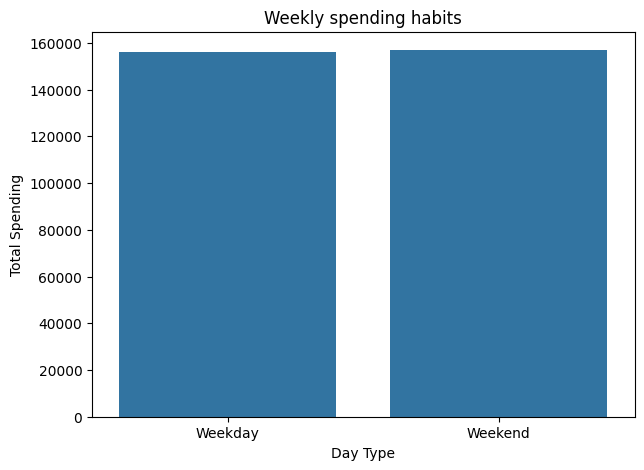

In [25]:
df['day_type'] = df['DayOfWeek'].apply(func= lambda x:'Weekday' if x <5 else 'Weekend')
weekly_spending = df.groupby('day_type')['Amount'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='day_type', y='Amount', data=weekly_spending)
plt.title('Weekly spending habits')
plt.xlabel('Day Type')
plt.ylabel('Total Spending')
plt.show()

Q7. In which season do people spend the most?

In [26]:
df.groupby('Seasons')['Amount'].sum().idxmax()

'Winter'

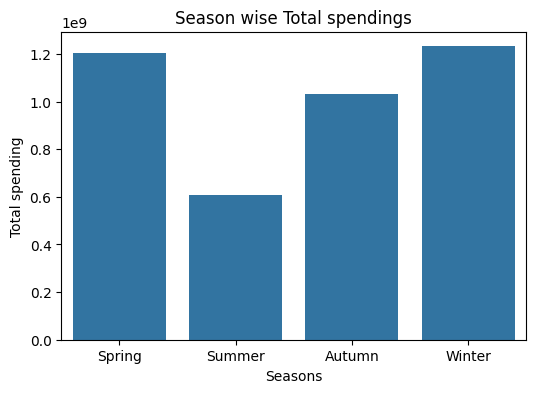

In [27]:
seasonal= df.groupby('Seasons')['Amount'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Seasons', y='Amount', data=seasonal, order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('Season wise Total spendings')
plt.xlabel('Seasons')
plt.ylabel('Total spending')
plt.show()

Q8. Which is the most popular card?

In [28]:
df['Card Type'].value_counts().index[0]

'Silver'

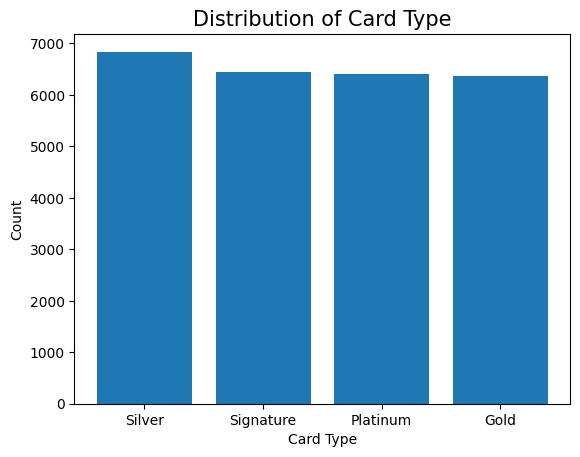

In [29]:
plt.bar(df['Card Type'].value_counts().index, df['Card Type'].value_counts())
plt.title('Distribution of Card Type',size=15)
plt.xlabel('Card Type',size=10)
plt.ylabel('Count',size=10)
plt.show()

Q9. Which city has the highest transcactions?

In [30]:
df['City'].value_counts().index[0]

'Bengaluru'

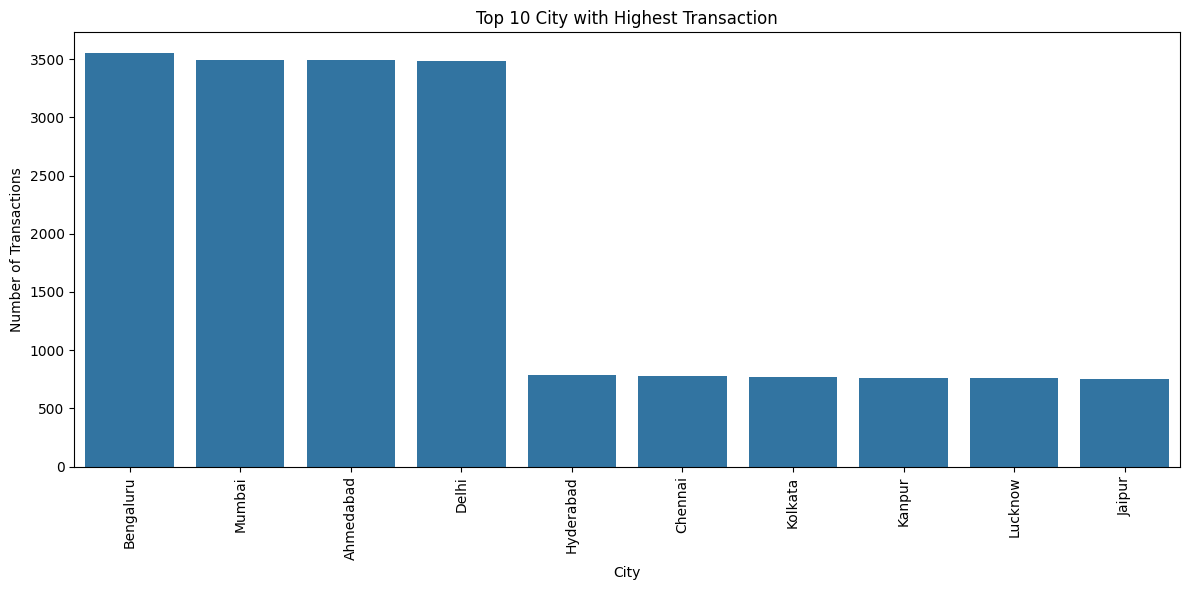

In [31]:
city_transaction=df['City'].value_counts()
N=10
Top_Cities= city_transaction.head(N)
plt.figure(figsize=(12,6))
sns.barplot(x=Top_Cities.index, y=Top_Cities.values)
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title(f'Top {N} City with Highest Transaction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Q10.  What is the average amount spent grouped by gender and season?


In [32]:
df.groupby(['Gender','Seasons'])['Amount'].mean()

Gender  Seasons
F       Autumn     160232.402338
        Spring     163983.828388
        Summer     158671.468148
        Winter     160554.500487
M       Autumn     152073.644953
        Spring     149612.381838
        Summer     149424.026082
        Winter     152609.092726
Name: Amount, dtype: float64

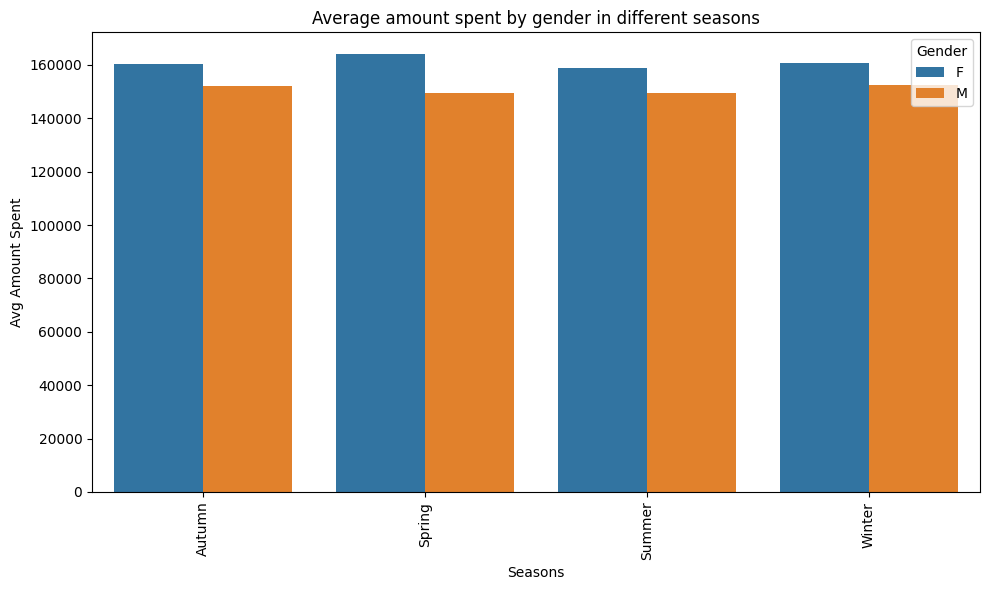

In [33]:
avg_spending=df.groupby(['Gender','Seasons'])['Amount'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Seasons', y='Amount', hue='Gender',data=avg_spending)
plt.xlabel('Seasons')
plt.ylabel('Avg Amount Spent')
plt.title('Average amount spent by gender in different seasons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Q11. How many transactions occurred in each city for each year?


In [34]:
transactions_by_city_year=df.groupby(['City','Year'])['index'].count().reset_index(name='Transaction Count')
print(transactions_by_city_year)

           City  Year  Transaction Count
0      Achalpur  2013                  1
1      Achalpur  2014                  6
2      Achalpur  2015                  2
3      Adilabad  2013                  3
4      Adilabad  2014                  4
...         ...   ...                ...
2314       Zira  2015                  2
2315   Zirakpur  2014                  2
2316   Zirakpur  2015                  1
2317  Zunheboto  2013                  1
2318  Zunheboto  2014                  2

[2319 rows x 3 columns]


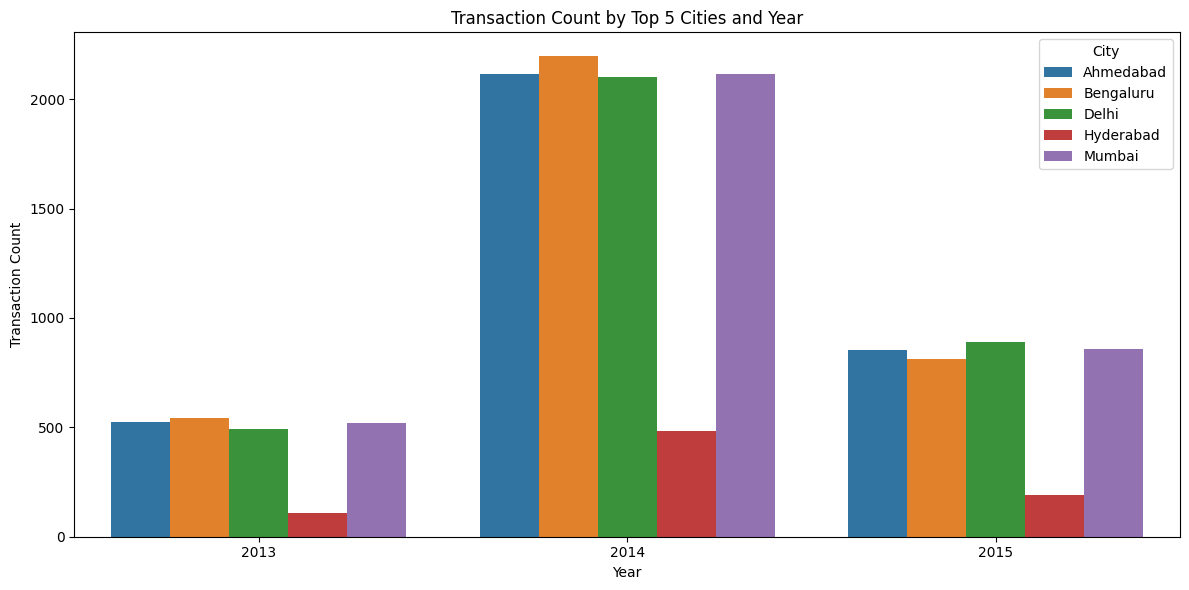

In [35]:
top_cities = transactions_by_city_year.groupby('City')['Transaction Count'].sum().nlargest(5).index
top_cities_data = transactions_by_city_year[transactions_by_city_year['City'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Transaction Count', hue='City', data=top_cities_data)
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Top 5 Cities and Year')
plt.tight_layout()
plt.legend(title='City')
plt.show()

Q12. What are the top 5 cities based on the total amount spent?


In [36]:
df.groupby('City')['Amount'].sum().nlargest(5)

,Amount
City,
Mumbai,576751476
Bengaluru,572326739
Ahmedabad,567794310
Delhi,556929212
Kolkata,115466943


Q13. What are the peak spending days for each season?


In [37]:
df

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Year,Day,DayOfWeek,Seasons,day_type
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,October,2014,29,2,Autumn,Weekday
1,1,Mumbai,2014-08-22,Platinum,Bills,F,32555,August,2014,22,4,Summer,Weekday
2,2,Bengaluru,2014-08-27,Silver,Bills,F,101738,August,2014,27,2,Summer,Weekday
3,3,Mumbai,2014-04-12,Signature,Bills,F,123424,April,2014,12,5,Spring,Weekend
4,4,Bengaluru,2015-05-05,Gold,Bills,F,171574,May,2015,5,1,Spring,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26047,26047,Kolkata,2014-06-22,Silver,Travel,F,128191,June,2014,22,6,Summer,Weekend
26048,26048,Pune,2014-08-03,Signature,Travel,M,246316,August,2014,3,6,Summer,Weekend
26049,26049,Hyderabad,2015-01-16,Silver,Travel,M,265019,January,2015,16,4,Winter,Weekday
26050,26050,Kanpur,2014-09-14,Silver,Travel,M,88174,September,2014,14,6,Autumn,Weekend


In [38]:
peak_spending_days = df.groupby(['Seasons', 'DayOfWeek'])['Amount'].sum().reset_index()
peak_days = peak_spending_days.loc[peak_spending_days.groupby('Seasons')['Amount'].idxmax()]

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_days['DayOfWeek'] = peak_days['DayOfWeek'].map(lambda x: day_names[x])

print(peak_days[['Seasons', 'DayOfWeek', 'Amount']])

   Seasons DayOfWeek     Amount
5   Autumn  Saturday  159347559
8   Spring   Tuesday  179413637
20  Summer    Sunday   97117714
24  Winter  Thursday  179724441


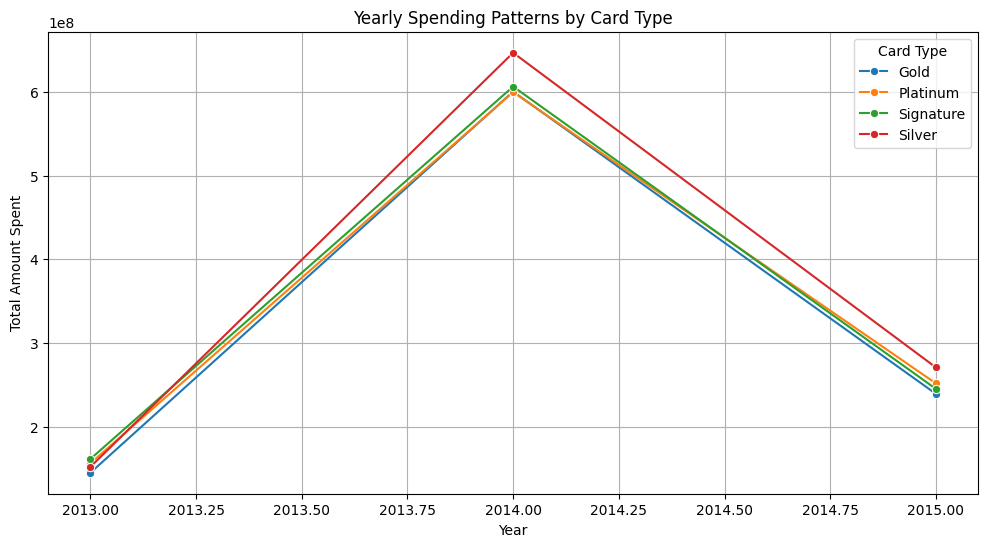

In [39]:
yearly_spending_by_card = df.groupby(['Year', 'Card Type'])['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Amount', hue='Card Type', data=yearly_spending_by_card, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Yearly Spending Patterns by Card Type')
plt.grid(True)
plt.legend(title='Card Type')
plt.show()

Q14.  How can we segment customers based on their spending habits, and which segments are most valuable?

In [40]:
result_df = df.groupby(['Gender', 'Card Type']).agg(
    TotalAmount=('Amount', 'sum'),
    TransactionCount=('Amount', 'count'),
    AvgTransactionAmount=('Amount', 'mean')
).reset_index()

# Calculate 'ValueIndex'
result_df['ValueIndex'] = (result_df['TotalAmount'] / result_df['TransactionCount'] * 100).round(2)

# Sort the results
result_df = result_df.sort_values(by=['TotalAmount', 'ValueIndex'], ascending=[False, False])

# Display the result
print(result_df)

  Gender  Card Type  TotalAmount  TransactionCount  AvgTransactionAmount  \
3      F     Silver    602433469              3773         159669.618076   
2      F  Signature    548005149              3368         162709.367280   
1      F   Platinum    531940229              3252         163573.256150   
0      F       Gold    522932183              3287         159091.020079   
5      M   Platinum    475698790              3146         151207.498411   
7      M     Silver    467180244              3067         152324.826867   
6      M  Signature    465035956              3079         151034.737252   
4      M       Gold    461607353              3080         149872.517208   

    ValueIndex  
3  15966961.81  
2  16270936.73  
1  16357325.62  
0  15909102.01  
5  15120749.84  
7  15232482.69  
6  15103473.73  
4  14987251.72  


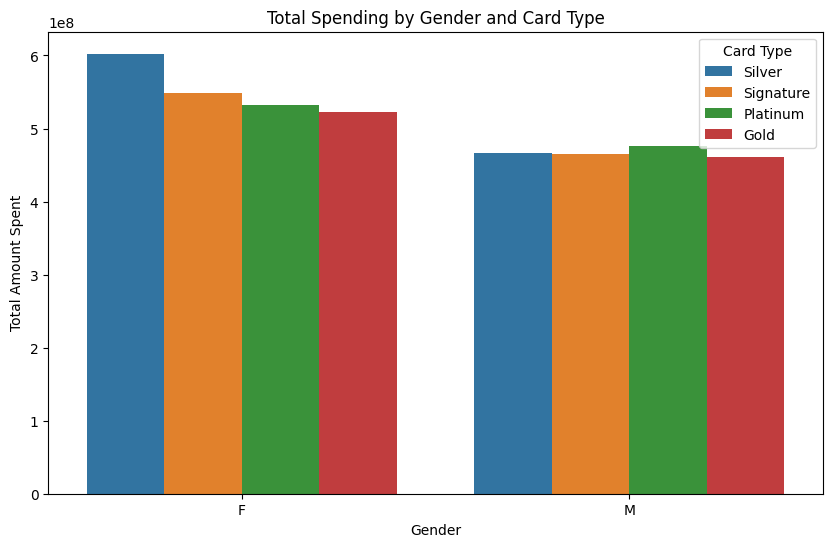

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='TotalAmount', hue='Card Type', data=result_df)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Total Spending by Gender and Card Type')
plt.legend(title='Card Type')
plt.show()

Q15. What are the peak spending days, and how do they compare to other days in terms of total and average spending?

In [42]:
daily_spending_total = df.groupby('DayOfWeek')['Amount'].sum()

# Calculate average spending for each day of the week
daily_spending_avg = df.groupby('DayOfWeek')['Amount'].mean()

# Find the day with the highest total spending
peak_spending_day_total = daily_spending_total.idxmax()
peak_spending_total = daily_spending_total.max()

# Find the day with the highest average spending
peak_spending_day_avg = daily_spending_avg.idxmax()
peak_spending_avg = daily_spending_avg.max()

# Map day numbers to day names for readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_spending_day_total_name = day_names[peak_spending_day_total]
peak_spending_day_avg_name = day_names[peak_spending_day_avg]

print(f"Peak spending day (total): {peak_spending_day_total_name} with a total of ${peak_spending_total:.2f}")
print(f"Peak spending day (average): {peak_spending_day_avg_name} with an average of ${peak_spending_avg:.2f}")

# Compare to other days
print("\nTotal Spending by Day:")
print(daily_spending_total)

print("\nAverage Spending by Day:")
print(daily_spending_avg)

Peak spending day (total): Sunday with a total of $596345367.00
Peak spending day (average): Tuesday with an average of $159126.20

Total Spending by Day:
DayOfWeek
0    573626475
1    588289572
2    571231164
3    574399018
4    582828807
5    588112970
6    596345367
Name: Amount, dtype: int64

Average Spending by Day:
DayOfWeek
0    154408.203230
1    159126.202867
2    156287.596170
3    154491.398063
4    156716.538586
5    157417.818522
6    156438.973505
Name: Amount, dtype: float64


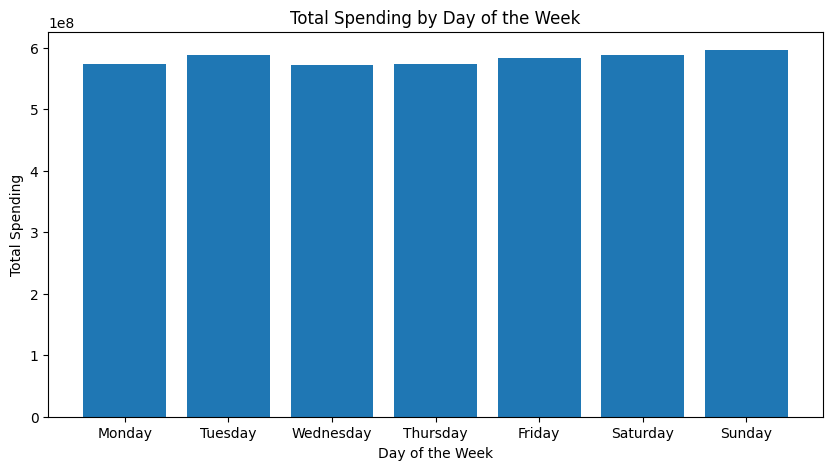

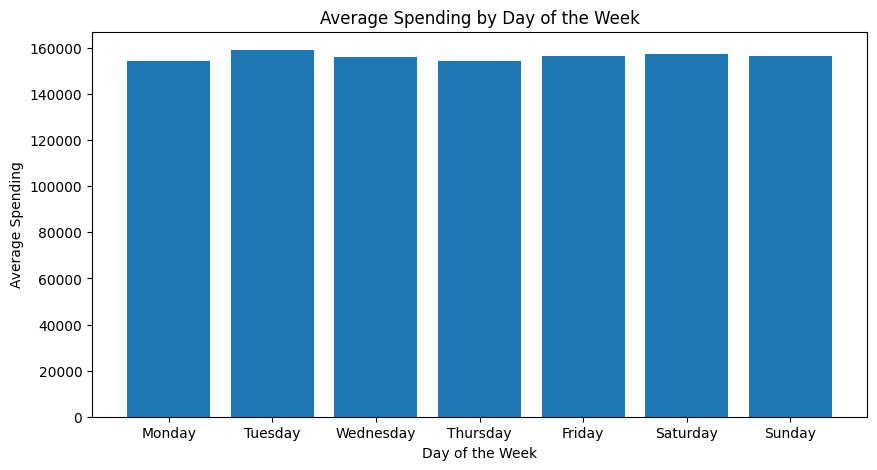

In [43]:
# Plot for Total Spending
plt.figure(figsize=(10, 5))
plt.bar(day_names, daily_spending_total)
plt.xlabel('Day of the Week')
plt.ylabel('Total Spending')
plt.title('Total Spending by Day of the Week')
plt.show()

# Plot for Average Spending
plt.figure(figsize=(10, 5))
plt.bar(day_names, daily_spending_avg)
plt.xlabel('Day of the Week')
plt.ylabel('Average Spending')
plt.title('Average Spending by Day of the Week')
plt.show()


Q16. How does the use of different card types vary with seasons, and which card type is preferred in each season?


In [45]:
seasonal_card_usage = df.groupby(['Seasons', 'Card Type'])['Amount'].count().reset_index(name='TransactionCount')

# Find the preferred card type for each season
preferred_cards = seasonal_card_usage.loc[seasonal_card_usage.groupby('Seasons')['TransactionCount'].idxmax()]

print(preferred_cards[['Seasons', 'Card Type', 'TransactionCount']])

   Seasons  Card Type  TransactionCount
2   Autumn  Signature              1707
7   Spring     Silver              2038
11  Summer     Silver              1042
15  Winter     Silver              2076


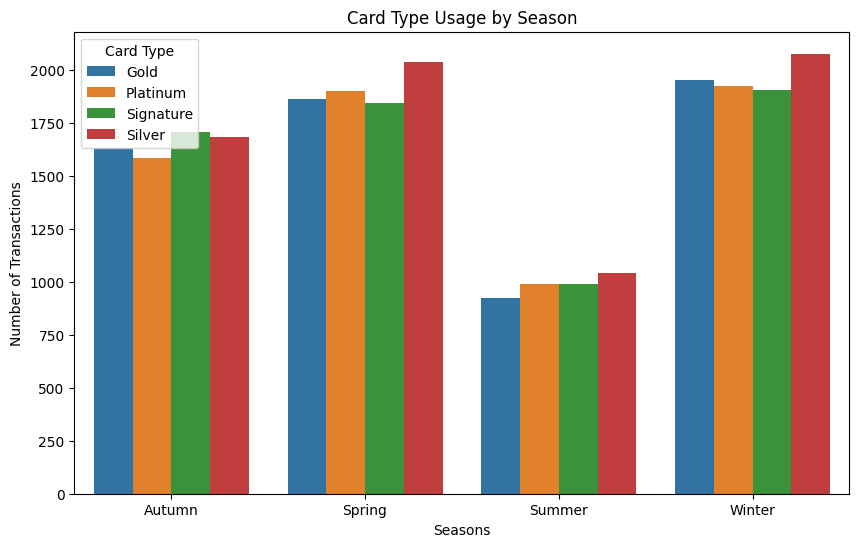

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='TransactionCount', hue='Card Type', data=seasonal_card_usage)
plt.xlabel('Seasons')
plt.ylabel('Number of Transactions')
plt.title('Card Type Usage by Season')
plt.legend(title='Card Type')
plt.show()